In [1]:
import pandas as pd
import numpy as np
import multiprocessing
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt


In [3]:
def ebert_result(dataset,target,threshhold,n_layers,lembda,power=1):
    """ This function calculates list of number of datapoints exit from each layer, accuracy and cost incurred by EBERT Model.

    Args:
        dataset (np.ndarray): array containing the probability vector of each datapoint with respect to each layer
        target (np.ndarray): array containing the actual label of datapoint
        threshhold : Threshold value($\alpha$)
        n_layers : Total number of layers in Neural network
        lembda : Computational cost per layer
        power (int, optional): _description_. Defaults to 1.

    Returns:
        _type_: list of number of datapoints exit from each layer, accuracy and cost incurred by EBERT Model
    """
    
    
    
    exit_layer=[0]*n_layers
    count=0
    cost=0
    for i in range(len(dataset)):
        j=0
        confidence=0
        while confidence<threshhold:
            confidence=max(dataset[i][j])
            j+=1
            if j==n_layers-1:
                break
        cost+=lembda*((j+1)**power)
        if np.argmax(dataset[i][j])==target[i]:
            count+=1
        exit_layer[j]+=1
    return exit_layer,count/len(target),cost

In [5]:

def cost_and_accuracy_calculate_ebert(cost,threshhold,power=1):
    """It calculates accuracy and cost for each dataset("IMDB","SCITAIL","SNLI","YELP","QQP")


    Args:
        cost : cost of computation per layer
        threshhold: list of thresholds
        power (int, optional): _description_. Defaults to 1.

    Returns:
        _type_: returns accuracy and cost for each dataset("IMDB","SCITAIL","SNLI","YELP","QQP")
    """
    exit_qqp=[]
    cos_qqp=[]
    re_qqp=[]
    exit_snli=[]
    re_snli=[]
    cos_snli=[]
    exit_scitail=[]
    re_scitail=[]
    cos_scitail=[]
    exit_imdb=[]
    re_imdb=[]
    cos_imdb=[]
    exit_yelp=[]
    re_yelp=[]
    cos_yelp=[]
    df=df_qqp.iloc[:,:-1].to_numpy()
    target=df_qqp.iloc[:,-1].to_numpy()
    for i in threshhold:
        sample_exit_qqp,accuracy_qqp,cos=ebert_result(df,target,i,12,cost,power)
        re_qqp.append(accuracy_qqp)
        cos_qqp.append(10*cos)
        exit_qqp.append(sample_exit_qqp)
    df=df_snli.iloc[:,:-1].to_numpy()
    target=df_snli.iloc[:,-1].to_numpy()

    for i in threshhold:
        sample_exit_snli,accuracy_snli,cos=ebert_result(df,target,i,12,cost,power)
        re_snli.append(accuracy_snli)
        cos_snli.append(10*cos)
        exit_snli.append(sample_exit_snli)
    df=df_scitail.iloc[:,:-1].to_numpy()
    target=df_scitail.iloc[:,-1].to_numpy()

    for i in threshhold:
        sample_exit_scitail,accuracy_scitail,cos=ebert_result(df,target,i,12,cost,power)
        re_scitail.append(accuracy_scitail)
        cos_scitail.append(10*cos)
        exit_scitail.append(sample_exit_scitail)
    df=df_imdb.iloc[:,:-1].to_numpy()
    target=df_imdb.iloc[:,-1].to_numpy()

    for i in threshhold:
        sample_exit_imdb,accuracy_imdb,cos=ebert_result(df,target,i,12,cost,power)
        re_imdb.append(accuracy_imdb)
        cos_imdb.append(10*cos)
        exit_imdb.append(sample_exit_imdb)
    df=df_yelp.iloc[:,:-1].to_numpy()
    target=df_yelp.iloc[:,-1].to_numpy()

    for i in threshhold:
        sample_exit_yelp,accuracy_yelp,cos=ebert_result(df,target,i,12,cost,power)
        re_yelp.append(accuracy_yelp)
        cos_yelp.append(10*cos)  
        exit_yelp.append(sample_exit_yelp)
    return re_qqp,cos_qqp,exit_qqp,re_snli,cos_snli,exit_snli,re_scitail,cos_scitail,exit_scitail,re_imdb,cos_imdb,exit_imdb,re_yelp,cos_yelp,exit_yelp

$\large \text{our threshold list for each dataset was : [0.6,0.65,0.7,0.75,0.8,0.85,0.9] } \\ \text{For scitail predetermined threshold is: 0.85} \\ \text{For snli predetermined threshold is: 0.75} \\ \text{For IMDB predetermined threshold is: 0.7} \\ \text{For QQP predetermined threshold is: 0.75} \\ \text{For yelp predetermined threshold is: 0.7}$

In [8]:
dict_results=pd.read_pickle('/home/divya/updated_code/Dataset/ucb_result_without_using_side_information.pkl')


In [22]:
def plot_accuracy_cost(op_list,a,threshold_datasets,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp,dict_results=dict_results):
    scitail_acc_thr_our=[]
    snli_acc_thr_our=[]
    imdb_acc_thr_our=[]
    qqp_acc_thr_our=[]
    yelp_acc_thr_our=[]
    scitail_cost_thr_our=[]
    snli_cost_thr_our=[] 
    imdb_cost_thr_our=[]
    qqp_cost_thr_our=[]
    yelp_cost_thr_our=[]
    scitail_opt_thr_our=[]
    snli_opt_thr_our=[]
    imdb_opt_thr_our=[]
    qqp_opt_thr_our=[]
    yelp_opt_thr_our=[]
    scitail_offload_thr_our=[]
    snli_offload_thr_our=[]
    imdb_offload_thr_our=[]
    qqp_offlaod_thr_our=[]
    yelp_offload_thr_our=[]
    
    # values from dictionaries
    imdb_results=dict_results['imdb']
    scitail_results=dict_results['scitail']
    snli_results=dict_results['snli']
    qqp_results=dict_results['qqp']
    yelp_results=dict_results['yelp']
    for op in op_list:
        
        # storation of optimal layers
        scitail_opt_thr_our.append(scitail_results[op][0])
        snli_opt_thr_our.append(snli_results[op][0])
        imdb_opt_thr_our.append(imdb_results[op][0])
        qqp_opt_thr_our.append(qqp__results[op][0])
        yelp_opt_thr_our.append(yelp_results[op][0])
        # storation of accuracies
        scitail_acc_thr_our.append(scitail_results[op][1])
        snli_acc_thr_our.append(snli_results[op][1])
        imdb_acc_thr_our.append(imdb_results[op][1])
        qqp_acc_thr_our.append(qqp_results[op][1])
        yelp_acc_thr_our.append(yelp_results[op][1])
        #storation of number of offloading at optimal layer
        scitail_offload_thr_our.append(scitail_results[op][2])
        snli_offload_thr_our.append(snli_results[op][2])
        imdb_offload_thr_our.append(imdb_results[op][2])
        qqp_offlaod_thr_our.append(qqp_results[op][2])
        yelp_offload_thr_our.append(yelp_results[op][2])
        # storation of cost 
        scitail_cost_thr_our.append(10*scitail_results[op][3])
        snli_cost_thr_our.append(10*snli_results[op][3])
        imdb_cost_thr_our.append(10*imdb_results[op][3])
        qqp_cost_thr_our.append(10*qqp_results[op][3])
        yelp_cost_thr_our.append(10*yelp_results[op][3])
    # making arrays
    scitail_acc_thr_our=np.array(scitail_acc_thr_our)
    snli_acc_thr_our=np.array(snli_acc_thr_our)
    imdb_acc_thr_our=np.array(imdb_acc_thr_our)
    qqp_acc_thr_our=np.array(qqp_acc_thr_our)
    yelp_acc_thr_our=np.array(yelp_acc_thr_our) 
    # accuracy in percenage
    scitail_acc_thr_our_per=scitail_acc_thr_our*100
    snli_acc_thr_our_per=snli_acc_thr_our*100
    imdb_acc_thr_our_per=imdb_acc_thr_our*100
    qqp_acc_thr_our_per=qqp_acc_thr_our*100
    yelp_acc_thr_our_per=yelp_acc_thr_our*100
    #cost in k
    scitail_cost_thr_our=np.array(scitail_cost_thr_our)/1000
    snli_cost_thr_our=np.array(snli_cost_thr_our)/1000
    imdb_cost_thr_our=np.array(imdb_cost_thr_our)/1000
    qqp_cost_thr_our=np.array(qqp_cost_thr_our)/1000
    yelp_cost_thr_our=np.array(yelp_cost_thr_our)/1000
    
    #Accuracy and cost in EBERT model
    scitail_acc_thr_ebert=np.array([re_scitail[-2] for _ in range(len(op_list))])
    snli_acc_thr_ebert=np.array([re_snli[-4] for _ in range(len(op_list))])
    imdb_acc_thr_ebert=np.array([re_imdb[-5] for _ in range(len(op_list))])
    qqp_acc_thr_ebert=np.array([re_qqp[-4] for _ in range(len(op_list))])
    yelp_acc_thr_ebert=np.array([re_yelp[-5] for _ in range(len(op_list))])
    # accuracy in percentage
    scitail_acc_thr_ebert_per=np.array([re_scitail[-2] for _ in range(len(op_list))])*100
    snli_acc_thr_ebert_per=np.array([re_snli[-4] for _ in range(len(op_list))])*100
    imdb_acc_thr_ebert_per=np.array([re_imdb[-5] for _ in range(len(op_list))])*100
    qqp_acc_thr_ebert_per=np.array([re_qqp[-4] for _ in range(len(op_list))])*100
    yelp_acc_thr_ebert_per=np.array([re_yelp[-5] for _ in range(len(op_list))])*100
    
    scitail_cost_thr_ebert=np.array([cos_scitail[-2] for _ in range(len(op_list))])/1000
    snli_cost_thr_ebert=np.array([cos_snli[-4] for _ in range(len(op_list))])/1000
    imdb_cost_thr_ebert=np.array([cos_imdb[-5] for _ in range(len(op_list))])/1000
    qqp_cost_thr_ebert=np.array([cos_qqp[-4] for _ in range(len(op_list))])/1000
    yelp_cost_thr_ebert=np.array([cos_yelp[-5] for _ in range(len(op_list))])/1000
    
    dataset_n=['imdb','yelp','QQP','Scitail','snli']
    acc_ebert=[imdb_acc_thr_ebert,yelp_acc_thr_ebert,qqp_acc_thr_ebert,scitail_acc_thr_ebert,snli_acc_thr_ebert]
    acc_ebert_per=[imdb_acc_thr_ebert_per,yelp_acc_thr_ebert_per,qqp_acc_thr_ebert_per,scitail_acc_thr_ebert_per,snli_acc_thr_ebert_per]
    acc_our=[imdb_acc_thr_our,yelp_acc_thr_our,qqp_acc_thr_our,scitail_acc_thr_our,snli_acc_thr_our]
    acc_our_per=[imdb_acc_thr_our_per,yelp_acc_thr_our_per,qqp_acc_thr_our_per,scitail_acc_thr_our_per,snli_acc_thr_our_per]
    cost_ebert=[imdb_cost_thr_ebert,yelp_cost_thr_ebert,qqp_cost_thr_ebert,scitail_cost_thr_ebert,snli_cost_thr_ebert]
    cost_our_model=[imdb_cost_thr_our,yelp_cost_thr_our,qqp_cost_thr_our,scitail_cost_thr_our,snli_cost_thr_our]
    
    print('Optimal layer on scitail dataset:',scitail_opt_thr_our)
    print('Optimal layer on Snli dataset:',snli_opt_thr_our)
    print('Optimal layer on imdb dataset:',imdb_opt_thr_our)
    print('Optimal layer on qqp dataset:',qqp_opt_thr_our)
    print('Optimal layer on scitail dataset:',yelp_opt_thr_our)
        
        
        
        
        
        
        
        
    
    

    # Create the figure
    def accuracy_plot(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label='Our Model')
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='imdb':
            ax_name.set_ylabel('Accuracy',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name}',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        

    def cost_plot(ax_name,dataset_name,op_list,cost_our_model,cost_ebert,threshold):
        ax_name.plot(op_list,cost_ebert,linestyle='-',color='g',marker='8',label='EBERT Model')
        ax_name.plot(op_list,cost_our_model,linestyle='--',color='b',marker='D',label='Our Model')
        ax_name.set_xlabel('Offloading cost(o)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        if dataset_name=='imdb':
            ax_name.set_ylabel('Cost (\u00D7 $\lambda$) (in k)',fontsize=18)
        ax_name.set_title(f'Cost over {dataset_name}',fontsize=18) #with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    def accuracy_plot_per(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label='Our Model')
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='imdb':
            ax_name.set_ylabel('Accuracy (in %)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name}',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    # accuracy in % plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot_per(l[i],dataset_n[i],op_list,acc_our_per[i],acc_ebert_per[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Dataset/Experiment/accuracy_plot_percentage.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    # accuracy  plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot(l[i],dataset_n[i],op_list,acc_our[i],acc_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Dataset/Experiment/accuracy_plot_normal.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    
    #cost(in k) plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        cost_plot(l[i],dataset_n[i],op_list,cost_our_model[i],cost_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Dataset/Experiment/cost_plot.pdf", format="pdf", bbox_inches="tight")
    fig.show()

In [20]:

threshhold=[0.6,0.65,0.7,0.75,0.8,0.85,0.9]
re_qqp,cos_qqp,exit_qqp,re_snli,cos_snli,exit_snli,re_scitail,cos_scitail,exit_scitail,re_imdb,cos_imdb,exit_imdb,re_yelp,cos_yelp,exit_yelp=cost_and_accuracy_calculate_ebert(1/10,threshhold,1)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


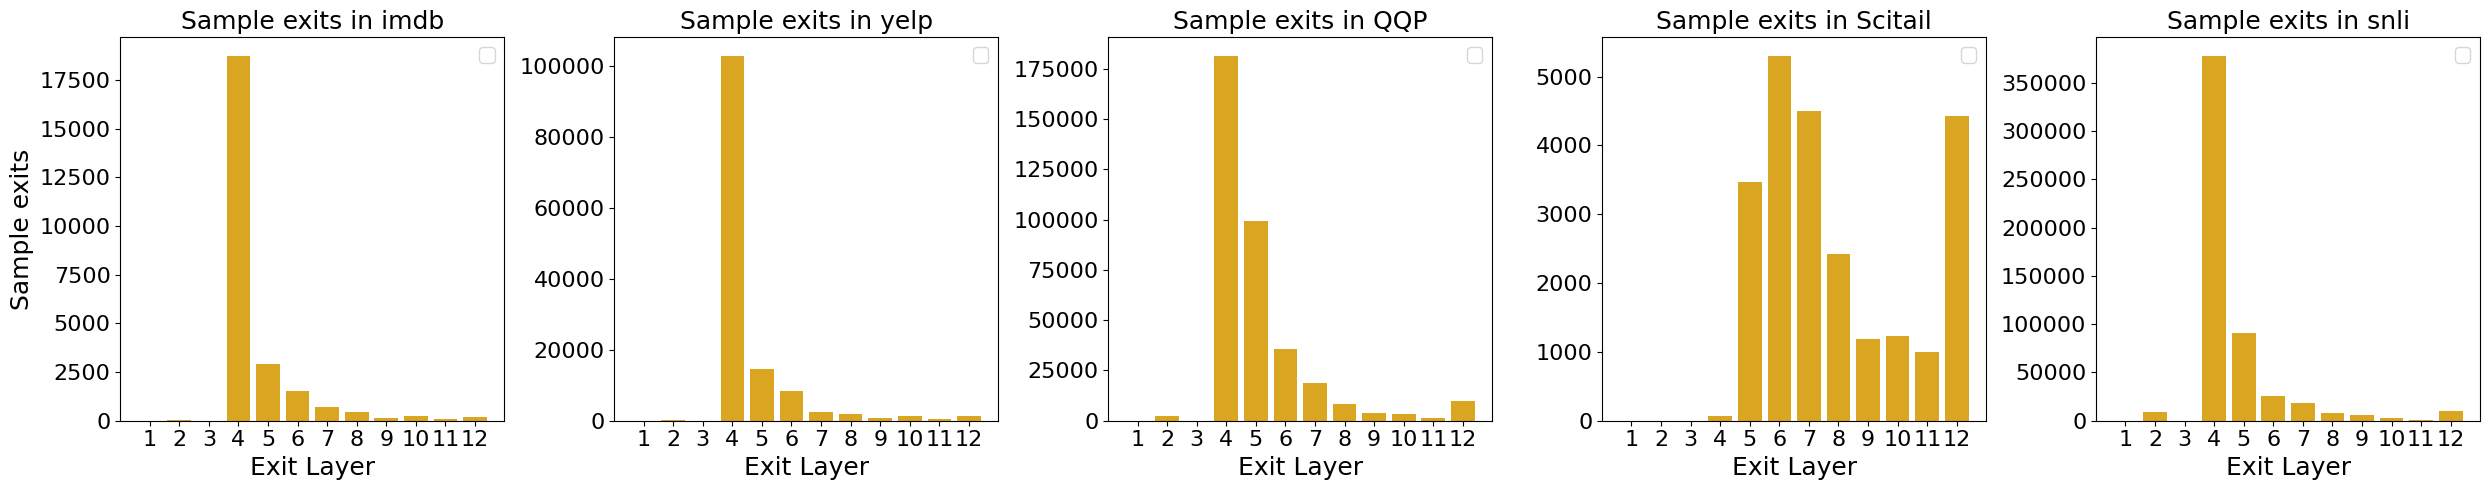

In [36]:
def Ebert_exit_plot(ax_name,dataset_name,n_layers,exit_samples):
    ax_name.bar([i for i in range(1,13)],exit_samples,color='goldenrod')
    ax_name.set_xlabel('Exit Layer',fontsize=18)
    ax_name.set_xticks([i+1 for i in range(12)])   
    if dataset_name=='imdb':
        ax_name.set_ylabel('Sample exits',fontsize=18)
    ax_name.tick_params(axis='x', labelsize=16)
    ax_name.tick_params(axis='y', labelsize=16)
    ax_name.set_title(f'Sample exits in {dataset_name}',fontsize=18) # with threshold:{threshold[dataset_name]}')
    
    ax_name.legend(fontsize=14)

dataset_n=['imdb','yelp','QQP','Scitail','snli']
exit_samples_dataset=[exit_imdb[-5],exit_yelp[-5],exit_qqp[-4],exit_scitail[-2],exit_snli[-4]]

   
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
l=[ax1, ax2,ax3,ax4,ax5]

for i in range(5):
    Ebert_exit_plot(l[i],dataset_n[i],12,exit_samples_dataset[i])
fig.tight_layout()
fig.savefig("/home/divya/vivek_sohan/dataset/Experiment/cost_calculate_During_ucb_updated/bar_plot.pdf", format="pdf", bbox_inches="tight")
fig.show()

Optimal layer on scitail dataset: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Optimal layer on Snli dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]
Optimal layer on imdb dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]
Optimal layer on qqp dataset: [0, 0, 0, 0, 0, 0, 0, 0, 3]
Optimal layer on scitail dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]


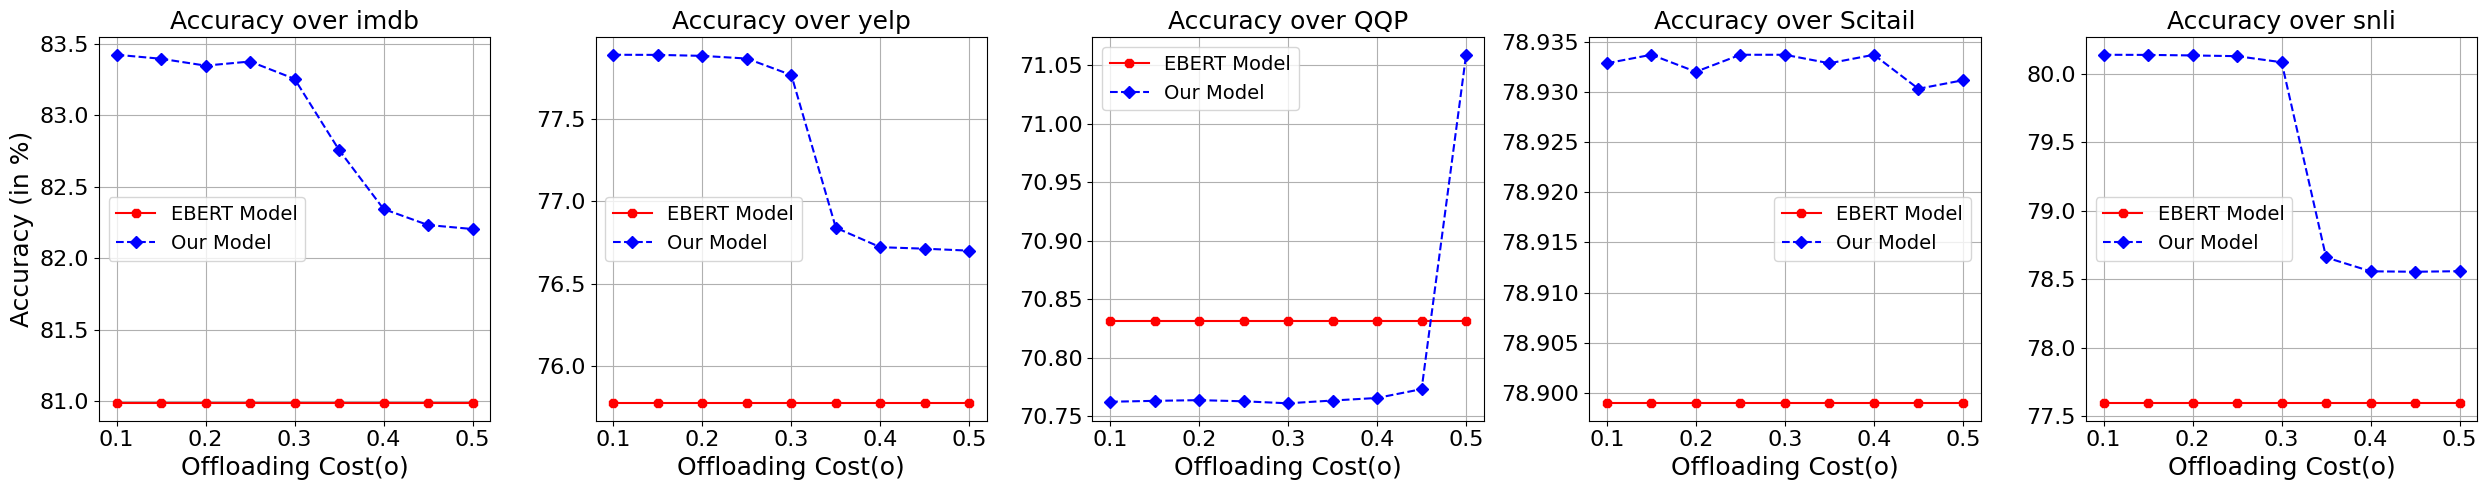

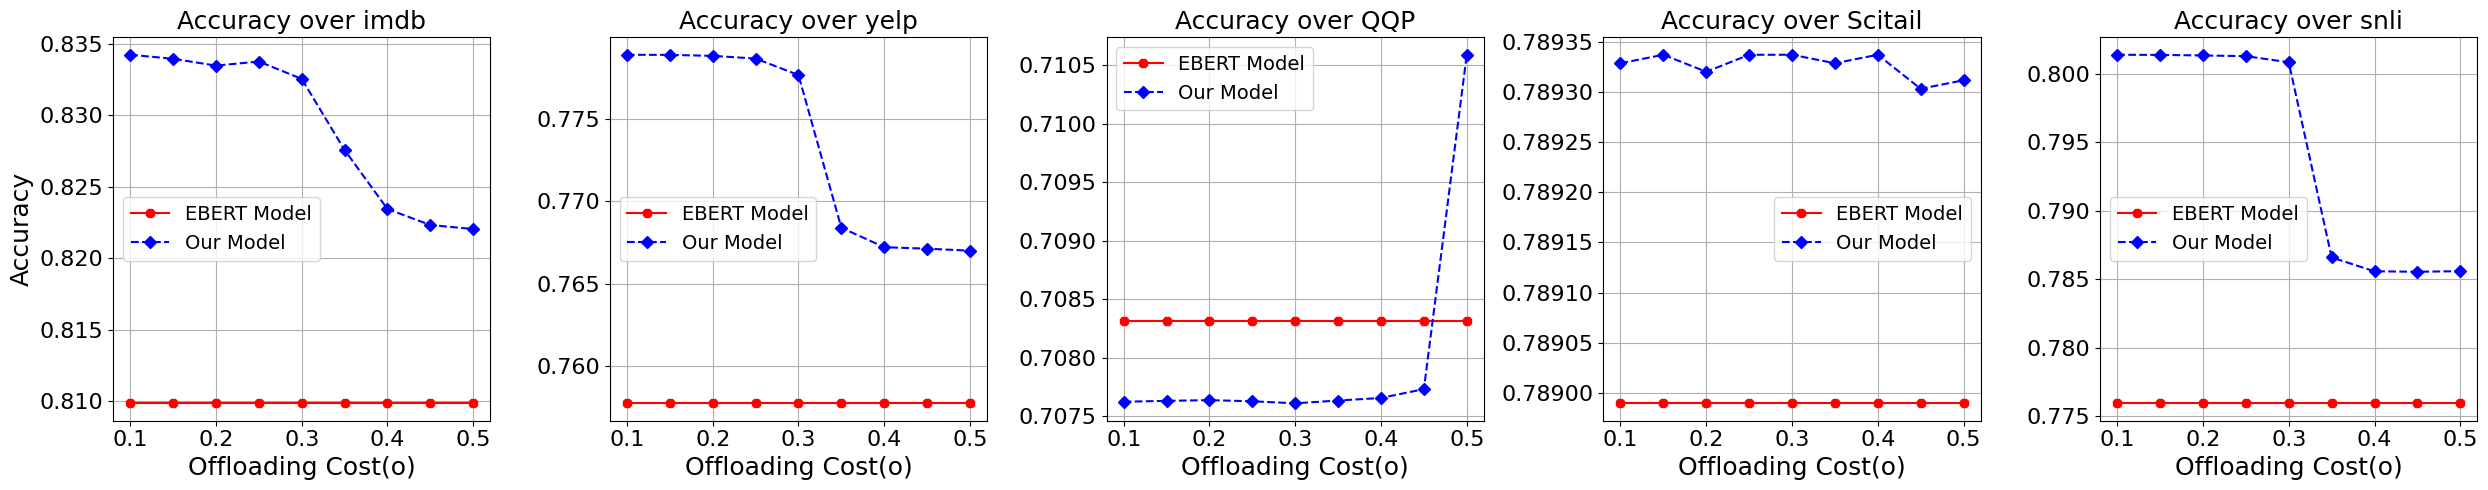

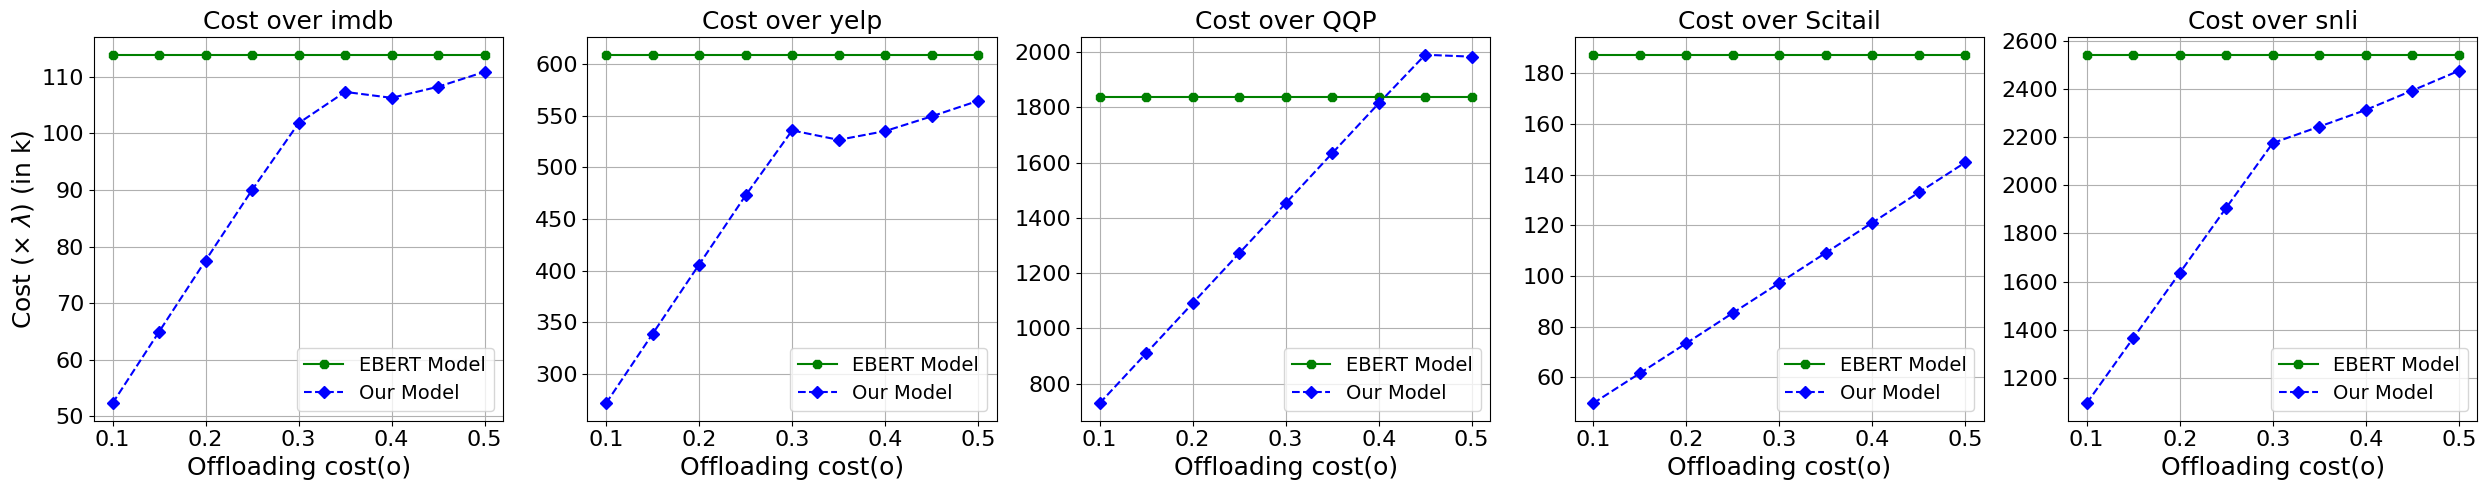

In [23]:
op_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
threshold_datasets={'imdb':0.7,'yelp':0.7,'QQP':0.75,'Scitail':0.85,'snli':0.75}
plot_accuracy_cost(op_list,1/10,threshold_datasets,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

Optimal layer on scitail dataset: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Optimal layer on Snli dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]
Optimal layer on imdb dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]
Optimal layer on qqp dataset: [0, 0, 0, 0, 0, 0, 0, 0, 3]
Optimal layer on scitail dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]


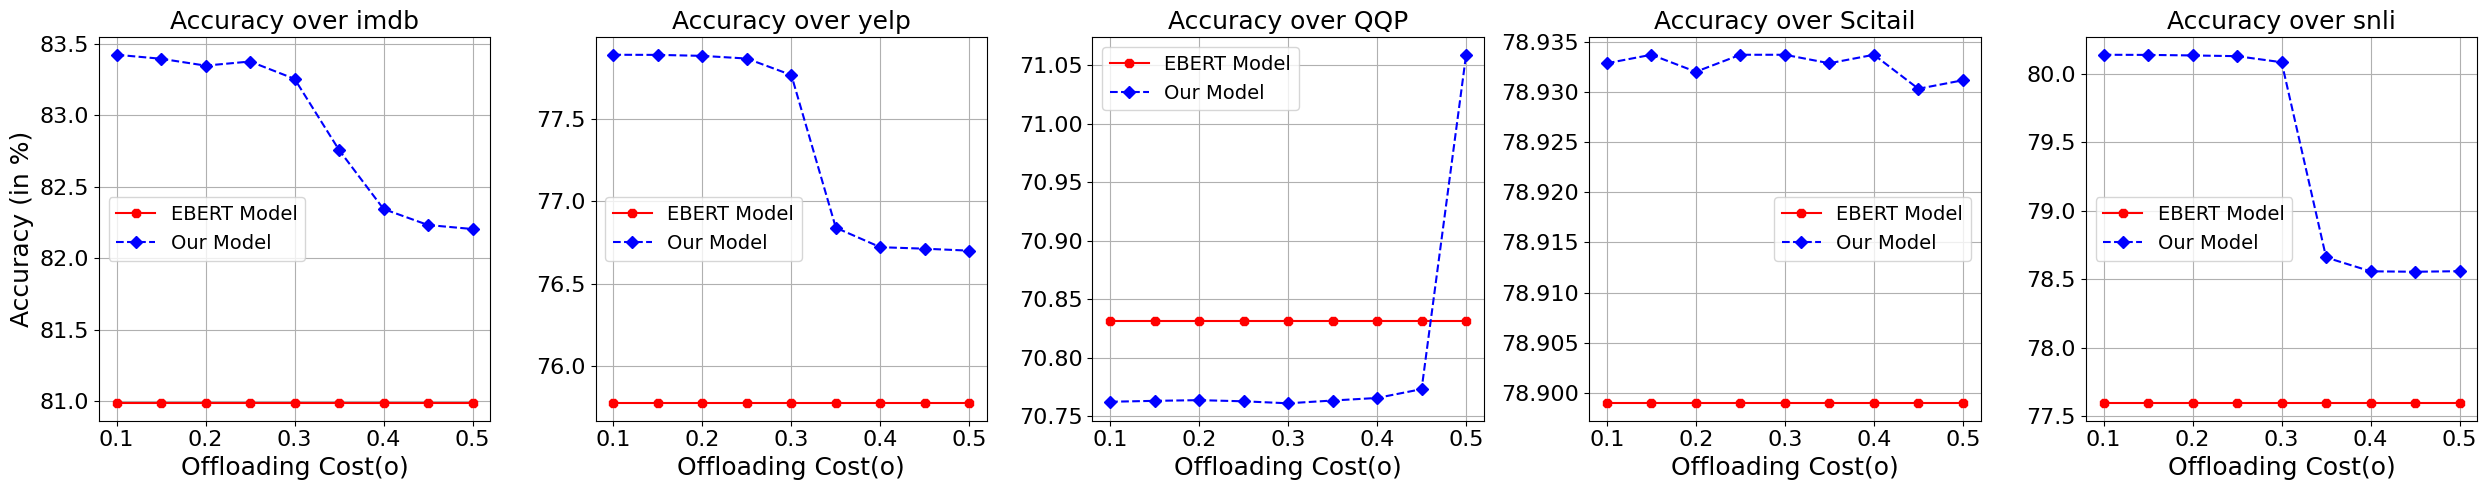

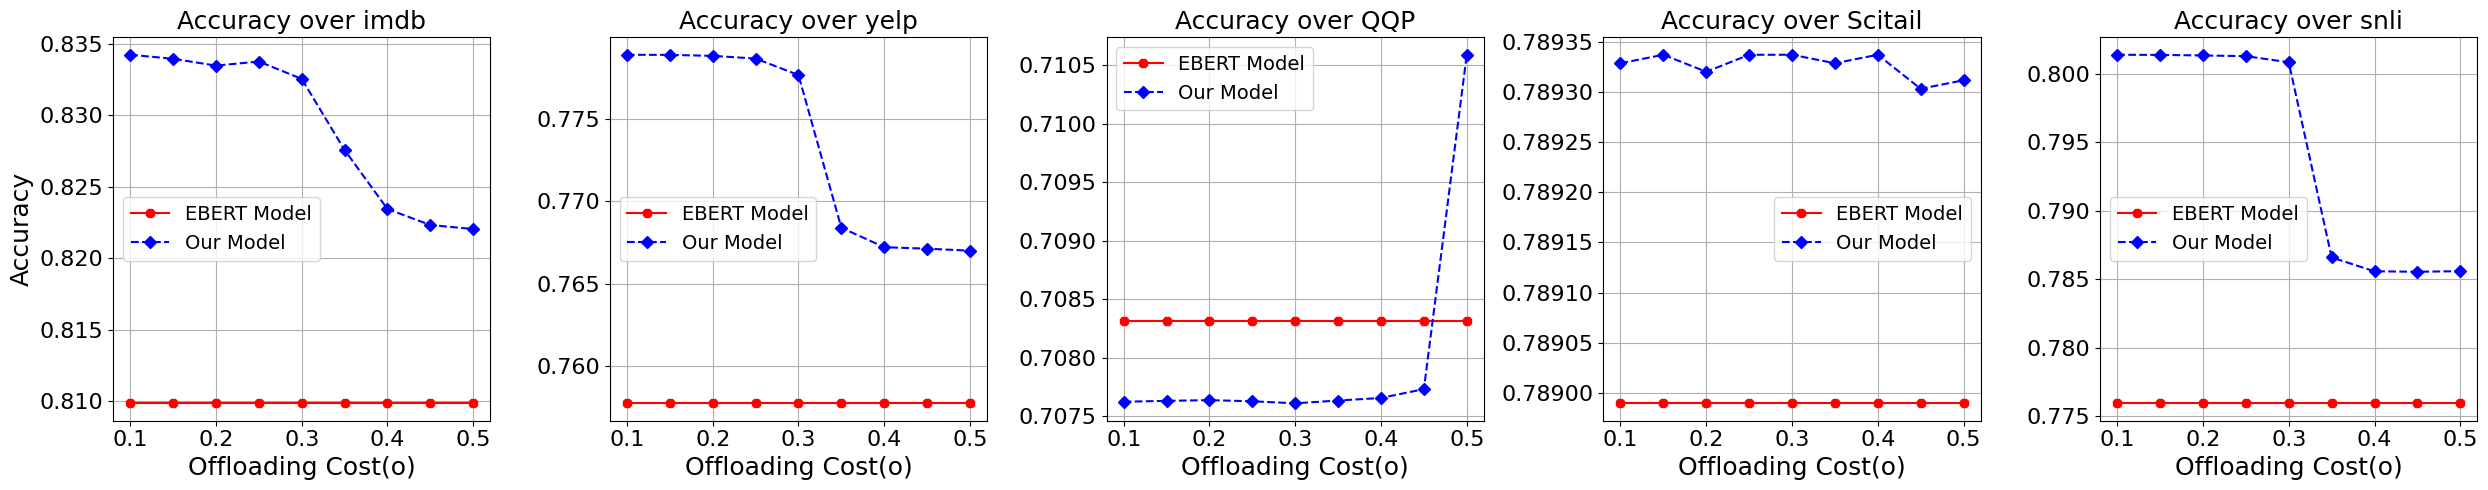

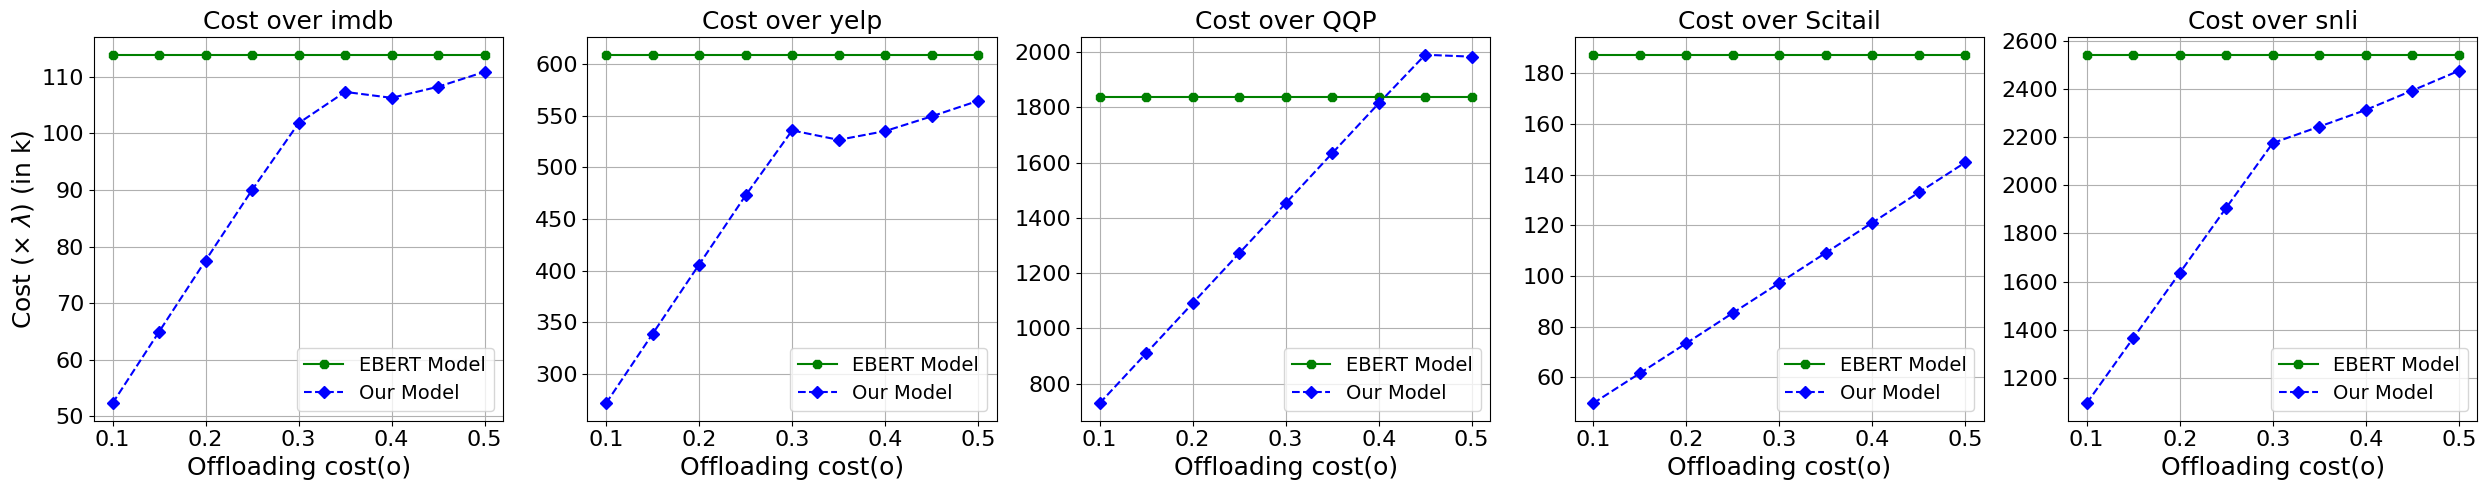

In [24]:
op_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
threshold_datasets={'imdb':0.7,'yelp':0.7,'QQP':0.75,'Scitail':0.85,'snli':0.75}
plot_accuracy_cost(op_list,1/10,threshold_datasets,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

Optimal layer on scitail dataset: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Optimal layer on Snli dataset: [0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0]
Optimal layer on imdb dataset: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0]
Optimal layer on qqp dataset: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0]
Optimal layer on scitail dataset: [0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0]


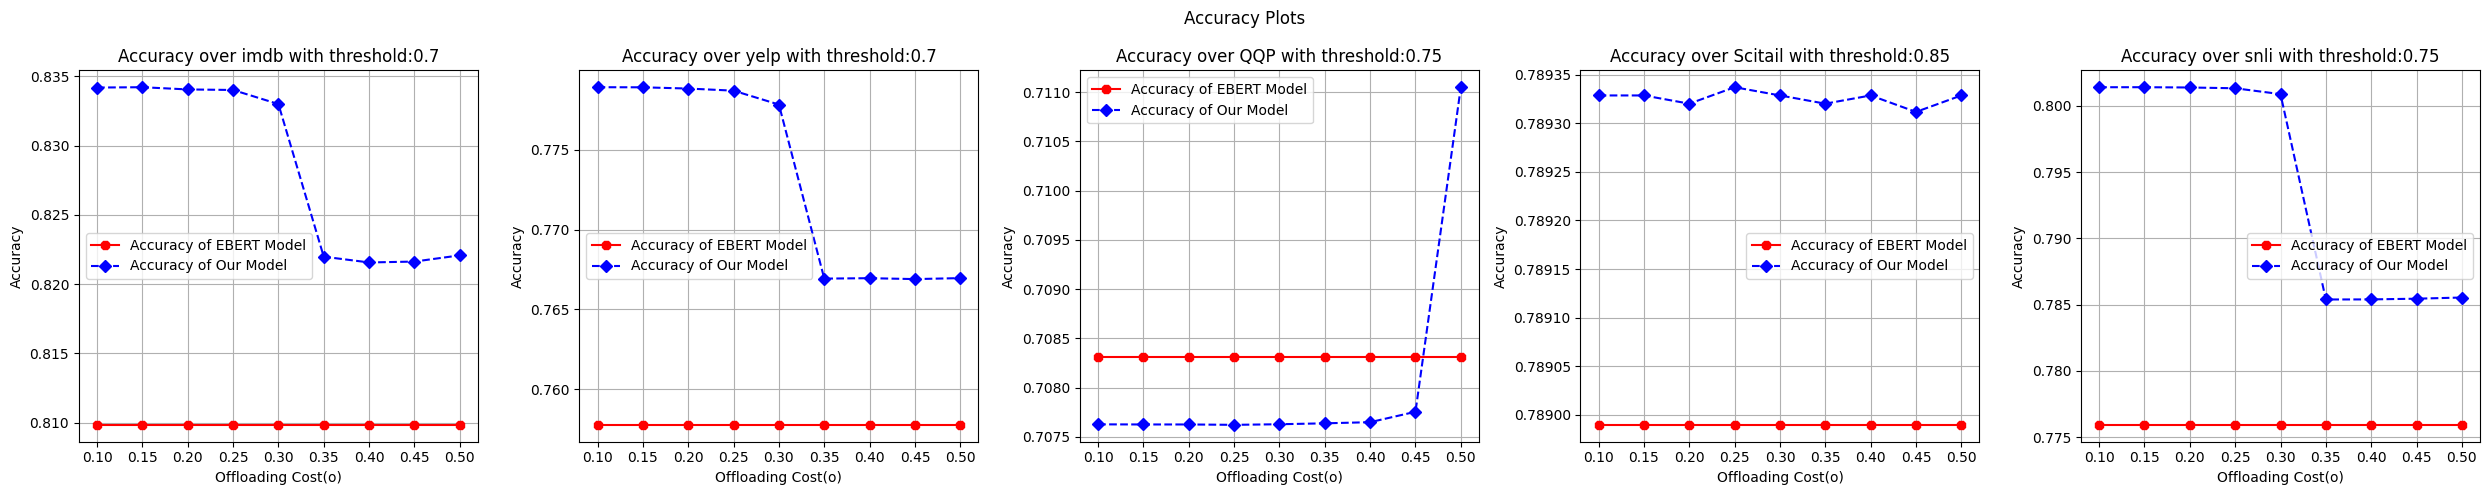

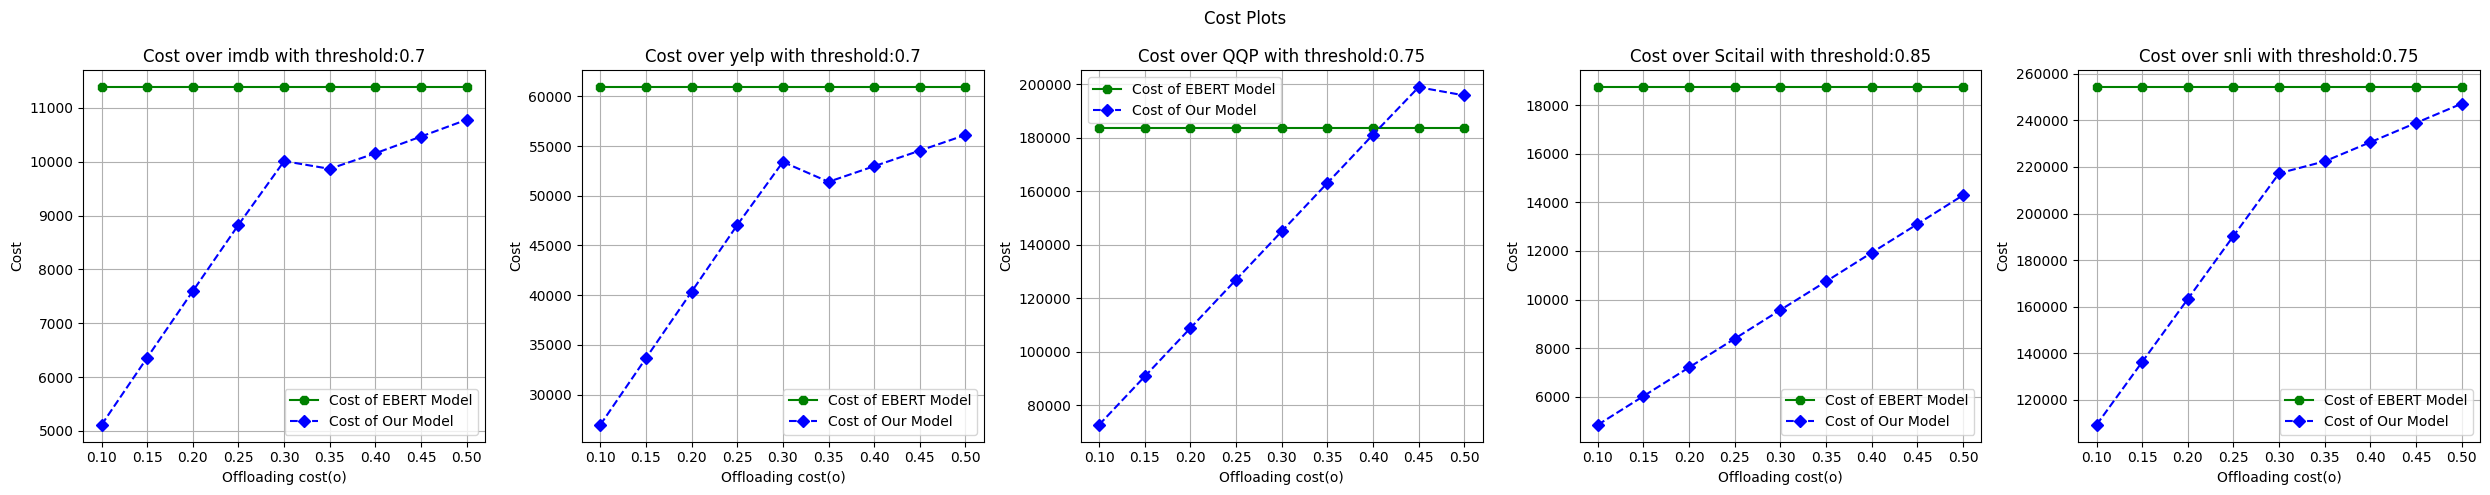

In [36]:

op_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
threshold_datasets={'imdb':0.7,'yelp':0.7,'QQP':0.75,'Scitail':0.85,'snli':0.75}
plot_accuracy_cost(op_list,1/10,threshold_datasets,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

optimal exit of scitail data 0.0
optimal exit of snli data 2.0
optimal exit of imdb data 2.0
optimal exit of qqp data 3.0
optimal exit of yelp data 2.0
********************************************************************************************************************************************
Number of sample offloaded of scitail data {0.6: 28612.4, 0.65: 26639.0, 0.7: 25539.2, 0.75: 25165.4, 0.8: 24951.6, 0.85: 24931.6}
Number of sample offloaded of snli data {0.6: 1145336.6, 0.65: 1188394.8, 0.7: 1221462.4, 0.75: 1255909.8, 0.8: 1294613.8, 0.85: 1342245.6}
Number of sample offloaded of imdb data {0.6: 52630.2, 0.65: 54723.6, 0.7: 56572.2, 0.75: 58606.8, 0.8: 60939.2, 0.85: 63833.2}
Number of sample offloaded of qqp data {0.6: 174419.2, 0.65: 307064.2, 0.7: 908769.2, 0.75: 1007651.6, 0.8: 456869.0, 0.85: 375914.2}
Number of sample offloaded of yelp data {0.6: 282092.8, 0.65: 290716.4, 0.7: 299951.4, 0.75: 309486.4, 0.8: 321159.0, 0.85: 334863.2}
****************************************

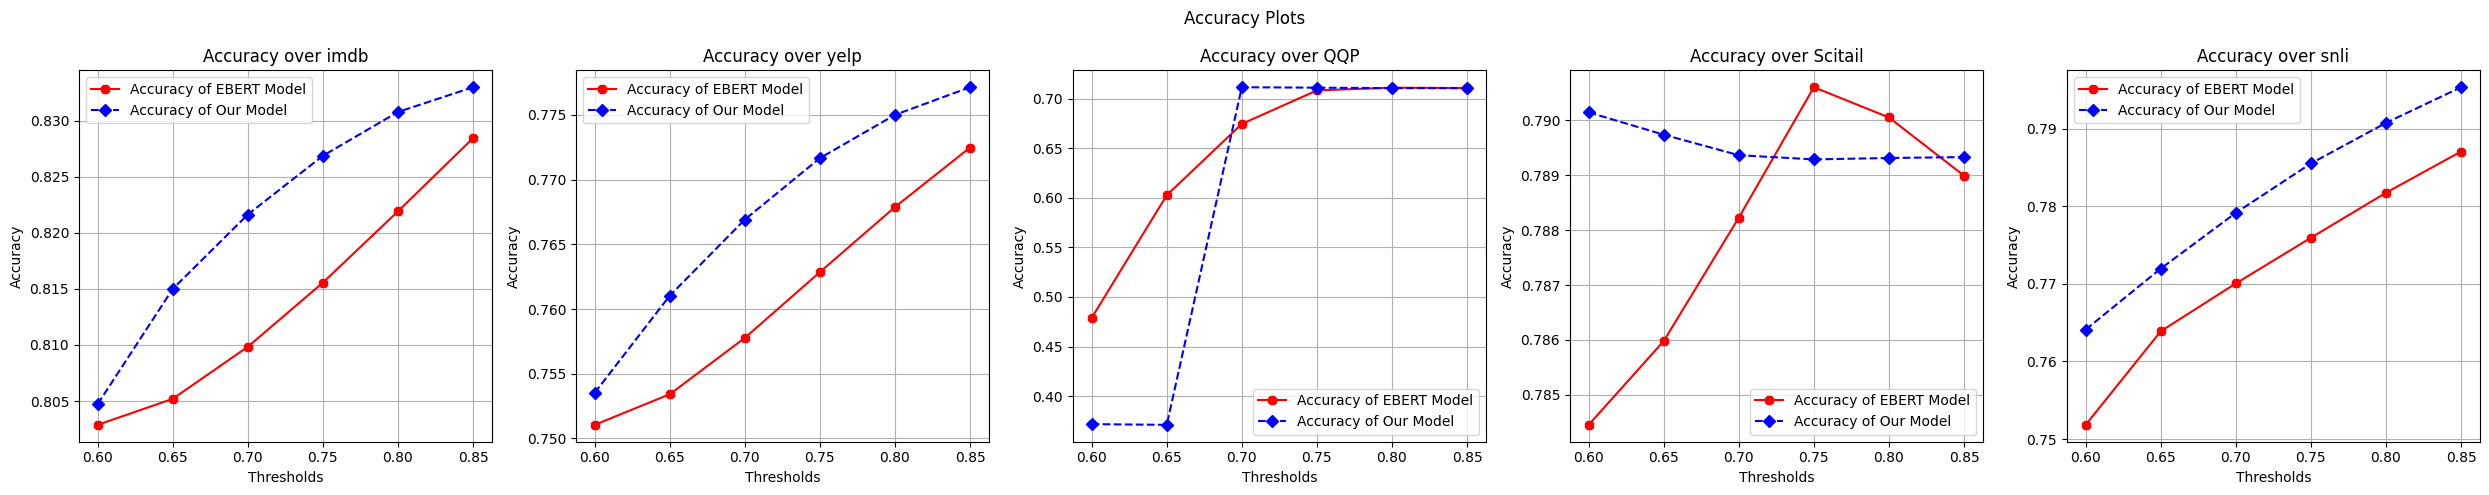

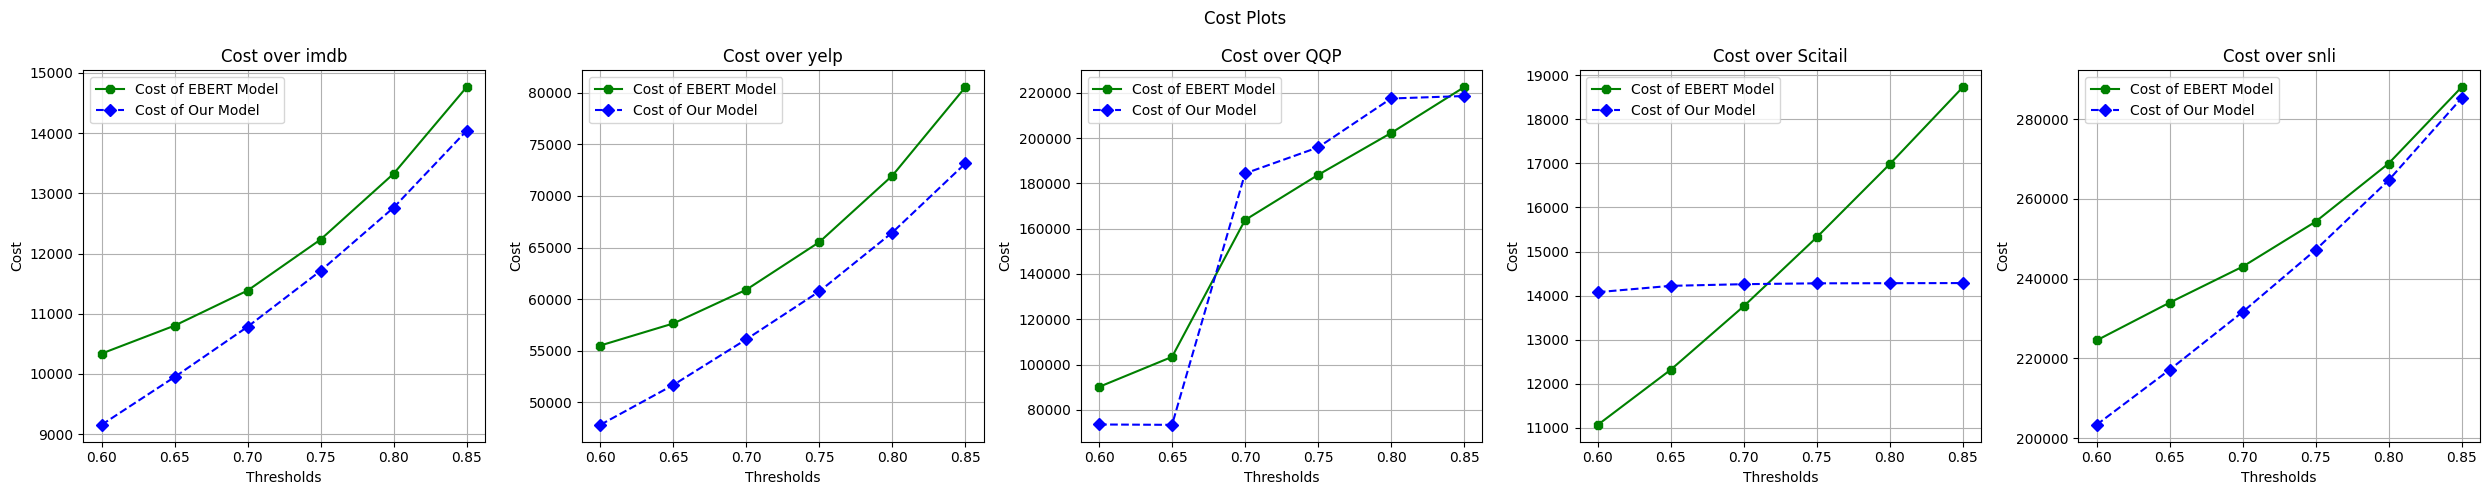

In [122]:
threshhold=[0.6,0.65,0.7,0.75,0.8,0.85]
cos_qqp=[]
re_qqp=[]
re_snli=[]
cos_snli=[]
re_scitail=[]
cos_scitail=[]
re_imdb=[]
cos_imdb=[]
re_yelp=[]
cos_yelp=[]
cost_and_accuracy_calculate_ebert(1/10,1)
plot_accuracy_cost(0.45,1/10,threshhold,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

optimal exit of scitail data 0.0
optimal exit of snli data 2.0
optimal exit of imdb data 2.0
optimal exit of qqp data 3.0
optimal exit of yelp data 2.0
********************************************************************************************************************************************
Number of sample offloaded of scitail data {0.6: 28612.4, 0.65: 26639.0, 0.7: 25539.2, 0.75: 25165.4, 0.8: 24951.6, 0.85: 24931.6}
Number of sample offloaded of snli data {0.6: 1145336.6, 0.65: 1188394.8, 0.7: 1221462.4, 0.75: 1255909.8, 0.8: 1294613.8, 0.85: 1342245.6}
Number of sample offloaded of imdb data {0.6: 52630.2, 0.65: 54723.6, 0.7: 56572.2, 0.75: 58606.8, 0.8: 60939.2, 0.85: 63833.2}
Number of sample offloaded of qqp data {0.6: 174419.2, 0.65: 307064.2, 0.7: 908769.2, 0.75: 1007651.6, 0.8: 456869.0, 0.85: 375914.2}
Number of sample offloaded of yelp data {0.6: 282092.8, 0.65: 290716.4, 0.7: 299951.4, 0.75: 309486.4, 0.8: 321159.0, 0.85: 334863.2}
****************************************

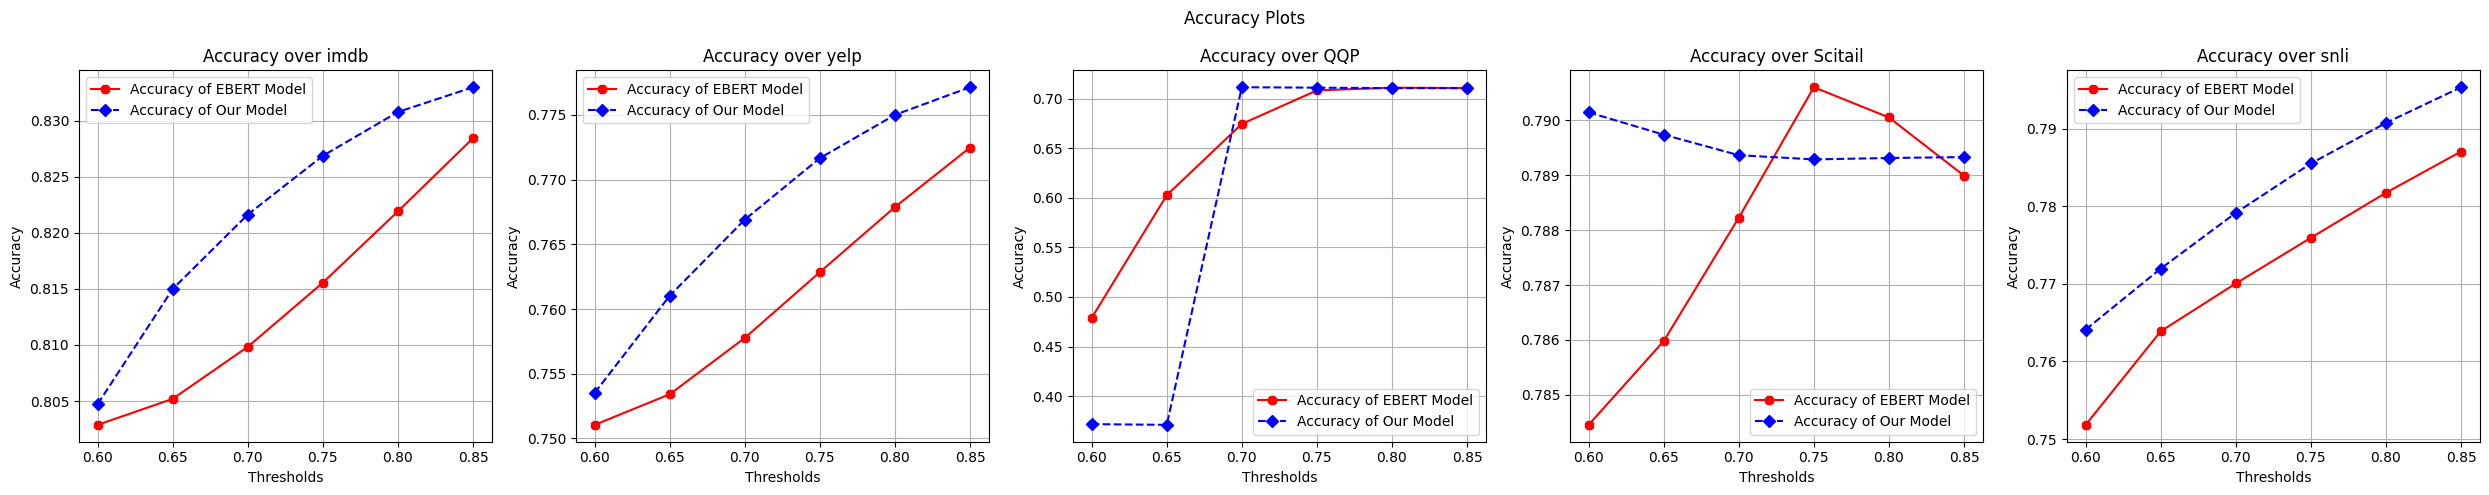

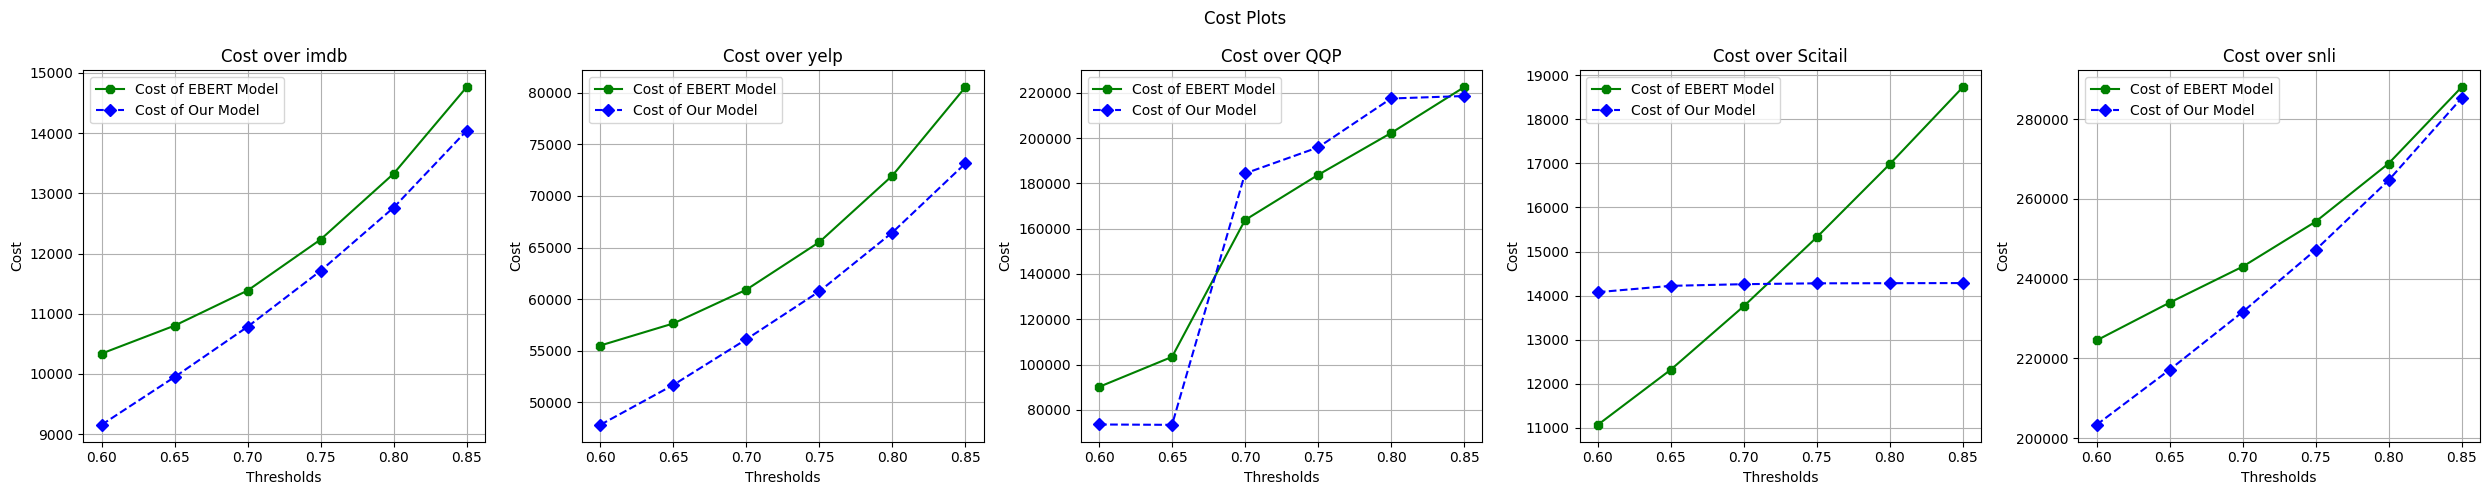

In [123]:
threshhold=[0.6,0.65,0.7,0.75,0.8,0.85]
cos_qqp=[]
re_qqp=[]
re_snli=[]
cos_snli=[]
re_scitail=[]
cos_scitail=[]
re_imdb=[]
cos_imdb=[]
re_yelp=[]
cos_yelp=[]
cost_and_accuracy_calculate_ebert(1/10,1)
plot_accuracy_cost(0.4,1/10,threshhold,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

optimal exit of scitail data 0.0
optimal exit of snli data 2.0
optimal exit of imdb data 2.0
optimal exit of qqp data 3.0
optimal exit of yelp data 2.0
********************************************************************************************************************************************
Number of sample offloaded of scitail data {0.6: 28612.4, 0.65: 26639.0, 0.7: 25539.2, 0.75: 25165.4, 0.8: 24951.6, 0.85: 24931.6}
Number of sample offloaded of snli data {0.6: 1145336.6, 0.65: 1188394.8, 0.7: 1221462.4, 0.75: 1255909.8, 0.8: 1294613.8, 0.85: 1342245.6}
Number of sample offloaded of imdb data {0.6: 52630.2, 0.65: 54723.6, 0.7: 56572.2, 0.75: 58606.8, 0.8: 60939.2, 0.85: 63833.2}
Number of sample offloaded of qqp data {0.6: 174419.2, 0.65: 307064.2, 0.7: 908769.2, 0.75: 1007651.6, 0.8: 456869.0, 0.85: 375914.2}
Number of sample offloaded of yelp data {0.6: 282092.8, 0.65: 290716.4, 0.7: 299951.4, 0.75: 309486.4, 0.8: 321159.0, 0.85: 334863.2}
****************************************

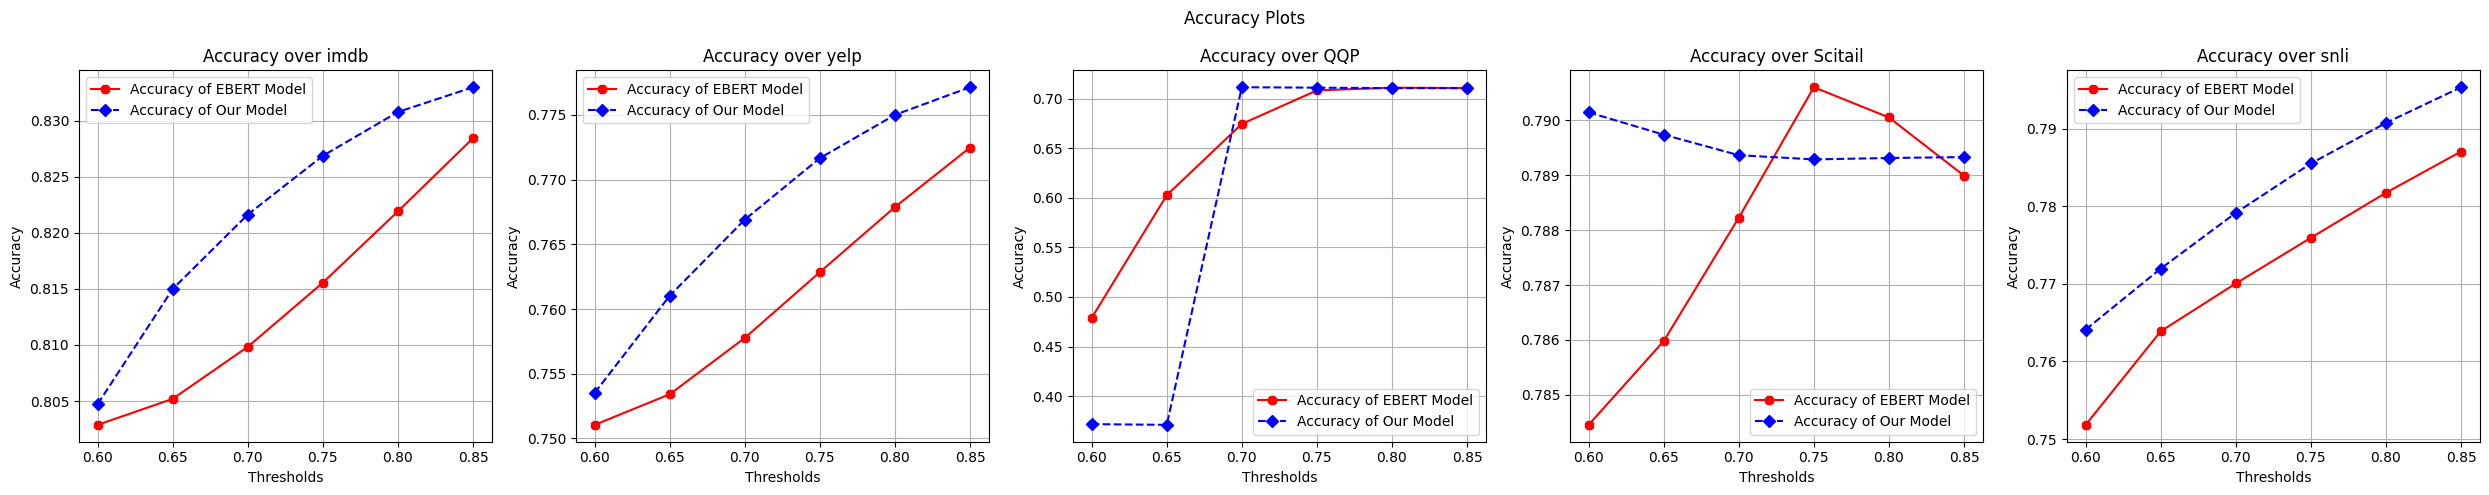

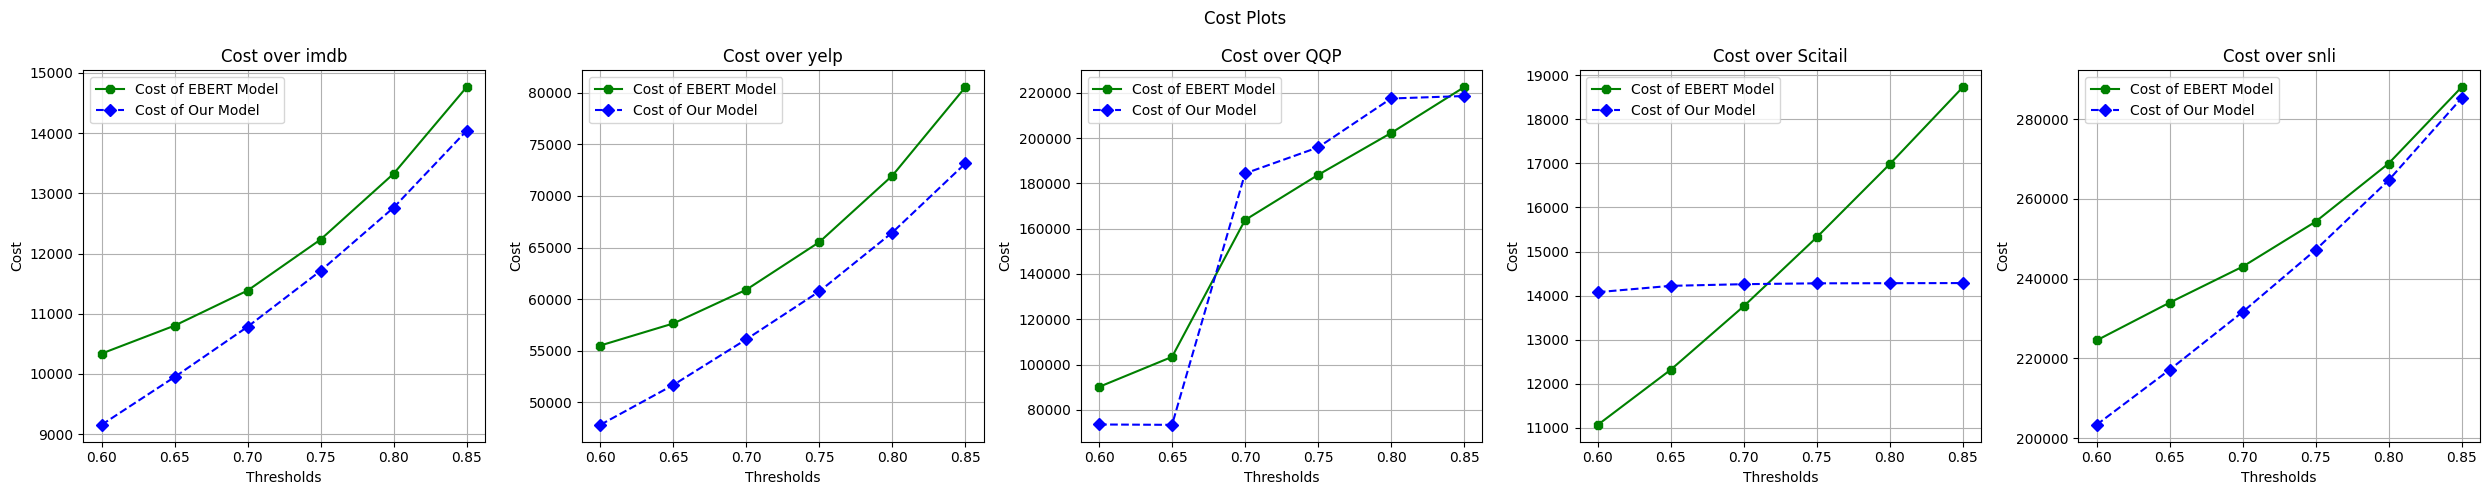

In [124]:
threshhold=[0.6,0.65,0.7,0.75,0.8,0.85]
cos_qqp=[]
re_qqp=[]
re_snli=[]
cos_snli=[]
re_scitail=[]
cos_scitail=[]
re_imdb=[]
cos_imdb=[]
re_yelp=[]
cos_yelp=[]
#scitail_re,snli_re,imdb_re,qqp_re,yelp_re=offload_and_layer_calculate_our(0.05)
cost_and_accuracy_calculate_ebert(1/10,1)
plot_accuracy_cost(0.55,1/10,threshhold,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

optimal exit of scitail data 0.0
optimal exit of snli data 2.0
optimal exit of imdb data 2.0
optimal exit of qqp data 3.0
optimal exit of yelp data 2.0
********************************************************************************************************************************************
Number of sample offloaded of scitail data {0.6: 28612.4, 0.65: 26639.0, 0.7: 25539.2, 0.75: 25165.4, 0.8: 24951.6, 0.85: 24931.6}
Number of sample offloaded of snli data {0.6: 1145336.6, 0.65: 1188394.8, 0.7: 1221462.4, 0.75: 1255909.8, 0.8: 1294613.8, 0.85: 1342245.6}
Number of sample offloaded of imdb data {0.6: 52630.2, 0.65: 54723.6, 0.7: 56572.2, 0.75: 58606.8, 0.8: 60939.2, 0.85: 63833.2}
Number of sample offloaded of qqp data {0.6: 174419.2, 0.65: 307064.2, 0.7: 908769.2, 0.75: 1007651.6, 0.8: 456869.0, 0.85: 375914.2}
Number of sample offloaded of yelp data {0.6: 282092.8, 0.65: 290716.4, 0.7: 299951.4, 0.75: 309486.4, 0.8: 321159.0, 0.85: 334863.2}
****************************************

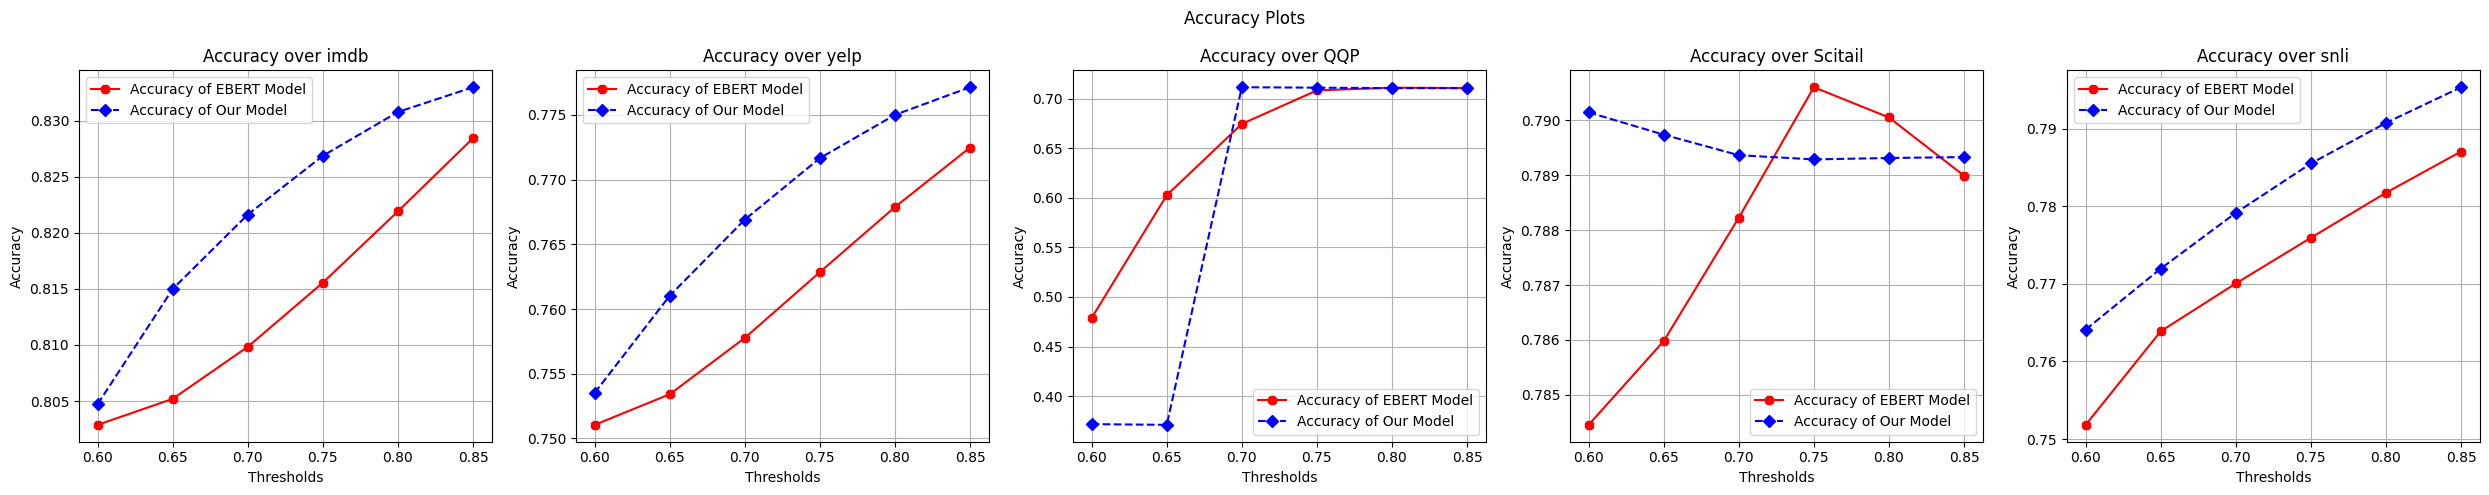

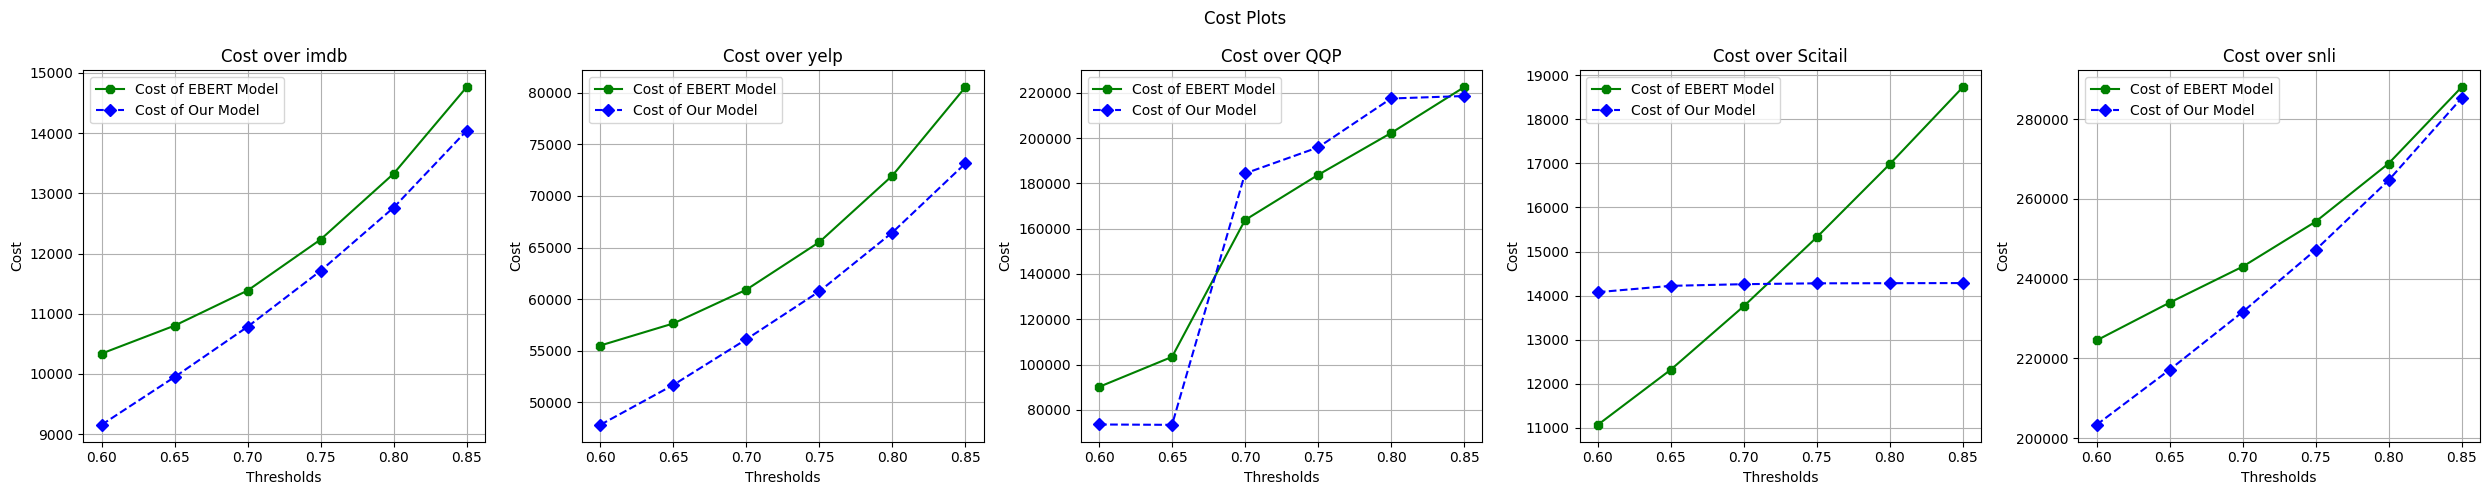

In [125]:
threshhold=[0.6,0.65,0.7,0.75,0.8,0.85]
cos_qqp=[]
re_qqp=[]
re_snli=[]
cos_snli=[]
re_scitail=[]
cos_scitail=[]
re_imdb=[]
cos_imdb=[]
re_yelp=[]
cos_yelp=[]
#scitail_re,snli_re,imdb_re,qqp_re,yelp_re=offload_and_layer_calculate_our(0.05)
cost_and_accuracy_calculate_ebert(1/10,1)
plot_accuracy_cost(0.6,1/10,threshhold,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

In [15]:
threshhold=[0.6,0.65,0.7,0.75,0.8,0.85]
cos_qqp=[]
re_qqp=[]
re_snli=[]
cos_snli=[]
re_scitail=[]
cos_scitail=[]
re_imdb=[]
cos_imdb=[]
re_yelp=[]
cos_yelp=[]
cost_and_accuracy_calculate_ebert(1/10,1)
plot_accuracy_cost(0.6,1/10,threshhold,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

optimal exit of scitail data {0.6: 0.0, 0.65: 0.0, 0.7: 0.0, 0.75: 0.0, 0.8: 0.0, 0.85: 0.0}
optimal exit of snli data {0.6: 4.0, 0.65: 4.0, 0.7: 4.0, 0.75: 4.0, 0.8: 4.0, 0.85: 4.0}
optimal exit of imdb data {0.6: 3.0, 0.65: 3.0, 0.7: 3.0, 0.75: 3.0, 0.8: 3.0, 0.85: 3.0}
optimal exit of qqp data {0.6: 1.0, 0.65: 1.0, 0.7: 4.0, 0.75: 4.0, 0.8: 0.0, 0.85: 0.0}
optimal exit of yelp data {0.6: 3.0, 0.65: 3.0, 0.7: 3.0, 0.75: 3.0, 0.8: 3.0, 0.85: 3.0}
********************************************************************************************************************************************
Number of sample offloaded of scitail data {0.6: 36485.2, 0.65: 30525.2, 0.7: 28371.8, 0.75: 27624.6, 0.8: 26911.2, 0.85: 26428.6}
Number of sample offloaded of snli data {0.6: 1225766.6, 0.65: 1300154.0, 0.7: 1364747.0, 0.75: 1432448.6, 0.8: 1506705.0, 0.85: 1579047.2}
Number of sample offloaded of imdb data {0.6: 54378.6, 0.65: 57208.2, 0.7: 59166.0, 0.75: 60307.2, 0.8: 57245.6, 0.85: 45659.2}
Number o

In [16]:
threshhold=[0.6,0.65,0.7,0.75,0.8,0.85]
cos_qqp=[]
re_qqp=[]
re_snli=[]
cos_snli=[]
re_scitail=[]
cos_scitail=[]
re_imdb=[]
cos_imdb=[]
re_yelp=[]
cos_yelp=[]
cost_and_accuracy_calculate_ebert(1/12,1)
plot_accuracy_cost(0.35,1/12,threshhold,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

optimal exit of scitail data [0. 0. 0. 0. 0. 0.]
optimal exit of snli data [0. 0. 0. 0. 0. 0.]
optimal exit of imdb data [0. 0. 0. 0. 0. 0.]
optimal exit of qqp data [0. 0. 0. 0. 0. 0.]
optimal exit of yelp data [0. 0. 0. 0. 0. 0.]


In [18]:
threshhold=[0.6,0.65,0.7,0.75,0.8,0.85]
cos_qqp=[]
re_qqp=[]
re_snli=[]
cos_snli=[]
re_scitail=[]
cos_scitail=[]
re_imdb=[]
cos_imdb=[]
re_yelp=[]
cos_yelp=[]
cost_and_accuracy_calculate_ebert(1/10,1)
plot_accuracy_cost(0.4,1/10,threshhold,cos_qqp,re_qqp,re_snli,cos_snli,re_scitail,cos_scitail,re_imdb,cos_imdb,re_yelp,cos_yelp)

optimal exit of scitail data [0. 0. 0. 0. 0. 0.]
optimal exit of snli data [2. 2. 2. 2. 2. 0.]
optimal exit of imdb data [2. 2. 2. 2. 0. 0.]
optimal exit of qqp data [1. 0. 0. 0. 0. 0.]
optimal exit of yelp data [2. 2. 2. 2. 0. 0.]
